In [ ]:
from IPython.display import HTML

HTML('<span style="color: red;font-size: 40px;">         DEPI HR Project       </span>')

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, precision_score, classification_report
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
df_ed=pd.read_csv('EducationLevel.csv')
df_ed

,EducationLevelID,EducationLevel
0,1,No Formal Qualifications
1,2,High School
2,3,Bachelors
3,4,Masters
4,5,Doctorate


In [ ]:
df_ed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   EducationLevelID  5 non-null      int64 
 1   EducationLevel    5 non-null      object
dtypes: int64(1), object(1)
memory usage: 208.0+ bytes


In [ ]:
df_ed['EducationLevel']=df_ed['EducationLevel'].astype('category')

In [ ]:
df_ed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   EducationLevelID  5 non-null      int64   
 1   EducationLevel    5 non-null      category
dtypes: category(1), int64(1)
memory usage: 385.0 bytes


In [ ]:
from IPython.display import HTML

HTML('<span style="color: red;font-size: 40px;">       End EducationLevel.csv     </span>')

In [ ]:
df_em=pd.read_csv('Employee.csv')
df_em

,EmployeeID,FirstName,LastName,Gender,Age,BusinessTravel,Department,DistanceFromHome (KM),State,Ethnicity,...,MaritalStatus,Salary,StockOptionLevel,OverTime,HireDate,Attrition,YearsAtCompany,YearsInMostRecentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,3012-1A41,Leonelle,Simco,Female,30,Some Travel,Sales,27,IL,White,...,Divorced,102059,1,No,2012-01-03,No,10,4,9,7
1,CBCB-9C9D,Leonerd,Aland,Male,38,Some Travel,Sales,23,CA,White,...,Single,157718,0,Yes,2012-01-04,No,10,6,10,0
2,95D7-1CE9,Ahmed,Sykes,Male,43,Some Travel,Human Resources,29,CA,Asian or Asian American,...,Married,309964,1,No,2012-01-04,No,10,6,10,8
3,47A0-559B,Ermentrude,Berrie,Non-Binary,39,Some Travel,Technology,12,IL,White,...,Married,293132,0,No,2012-01-05,No,10,10,10,0
4,42CC-040A,Stace,Savege,Female,29,Some Travel,Human Resources,29,CA,White,...,Single,49606,0,No,2012-01-05,Yes,6,1,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,467E-977A,Jud,Melanaphy,Male,20,Some Travel,Technology,28,CA,Black or African American,...,Single,38508,0,No,2022-12-26,No,0,0,0,0
1466,6FB9-A624,Marc,Calver,Non-Binary,27,Some Travel,Technology,8,CA,Black or African American,...,Single,92995,3,No,2022-12-30,No,0,0,0,0
1467,EBF4-5928,Rudolph,MacDearmont,Male,21,Some Travel,Sales,4,CA,Black or African American,...,Single,63375,0,No,2022-12-30,No,0,0,0,0
1468,60E6-B1D9,Merill,Agg,Male,21,Some Travel,Technology,7,CA,Black or African American,...,Married,46521,0,No,2022-12-30,No,0,0,0,0


In [ ]:
#Start Data employee analysis

In [ ]:
df_em.isnull().sum()

,0
EmployeeID,0
FirstName,0
LastName,0
Gender,0
Age,0
BusinessTravel,0
Department,0
DistanceFromHome (KM),0
State,0
Ethnicity,0


In [ ]:
df_em.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   EmployeeID               1470 non-null   object
 1   FirstName                1470 non-null   object
 2   LastName                 1470 non-null   object
 3   Gender                   1470 non-null   object
 4   Age                      1470 non-null   int64 
 5   BusinessTravel           1470 non-null   object
 6   Department               1470 non-null   object
 7   DistanceFromHome (KM)    1470 non-null   int64 
 8   State                    1470 non-null   object
 9   Ethnicity                1470 non-null   object
 10  Education                1470 non-null   int64 
 11  EducationField           1470 non-null   object
 12  JobRole                  1470 non-null   object
 13  MaritalStatus            1470 non-null   object
 14  Salary                   1470 non-null  

In [ ]:
df_em.head(1)

,EmployeeID,FirstName,LastName,Gender,Age,BusinessTravel,Department,DistanceFromHome (KM),State,Ethnicity,...,MaritalStatus,Salary,StockOptionLevel,OverTime,HireDate,Attrition,YearsAtCompany,YearsInMostRecentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,3012-1A41,Leonelle,Simco,Female,30,Some Travel,Sales,27,IL,White,...,Divorced,102059,1,No,2012-01-03,No,10,4,9,7


In [ ]:
df_em.describe()

,Age,DistanceFromHome (KM),Education,Salary,StockOptionLevel,YearsAtCompany,YearsInMostRecentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,28.989796,22.502721,2.912925,112956.497959,0.793878,4.562585,2.293197,3.440816,2.239456
std,7.993055,12.811124,1.024165,103342.889222,0.852077,3.288048,2.539093,2.945194,2.505774
min,18.000000,1.000000,1.000000,20387.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,12.000000,2.000000,43580.500000,0.000000,2.000000,0.000000,1.000000,0.000000
50%,26.000000,22.000000,3.000000,71199.500000,1.000000,4.000000,1.000000,3.000000,1.000000
75%,34.000000,33.000000,4.000000,142055.750000,1.000000,7.000000,4.000000,6.000000,4.000000
max,51.000000,45.000000,5.000000,547204.000000,3.000000,10.000000,10.000000,10.000000,10.000000


In [ ]:
df_em['Gender'] = df_em['Gender'].replace(['Non-Binary', 'Prefer Not To Say'], 'Other')


In [ ]:
for col in df_em.select_dtypes(include=['object']).columns:
    df_em[col] = df_em[col].astype('category')


In [ ]:
df_em['HireDate'] = pd.to_datetime(df_em['HireDate'], errors='coerce')

In [ ]:
df_em.rename(columns={'DistanceFromHome (KM)': 'DistanceFromHome_KM'}, inplace=True)


In [ ]:
df_em.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   EmployeeID               1470 non-null   category
 1   FirstName                1470 non-null   category
 2   LastName                 1470 non-null   category
 3   Gender                   1470 non-null   category
 4   Age                      1470 non-null   int64   
 5   BusinessTravel           1470 non-null   category
 6   Department               1470 non-null   category
 7   DistanceFromHome_KM      1470 non-null   int64   
 8   State                    1470 non-null   category
 9   Ethnicity                1470 non-null   category
 10  Education                1470 non-null   int64   
 11  EducationField           1470 non-null   category
 12  JobRole                  1470 non-null   category
 13  MaritalStatus            1470 non-null   category
 14  Salary  

In [ ]:
duplicates = df_em.duplicated()
print(duplicates.sum())

0


In [ ]:
from IPython.display import HTML

HTML('<span style="color: red;font-size: 40px;">         Data Visualization       </span>')

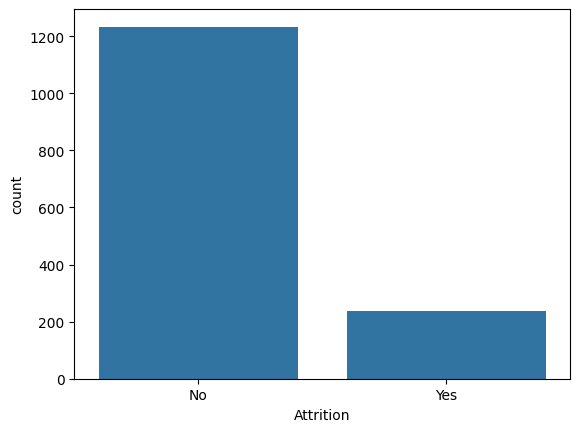

In [ ]:
sns.countplot(x='Attrition', data=df_em)

plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

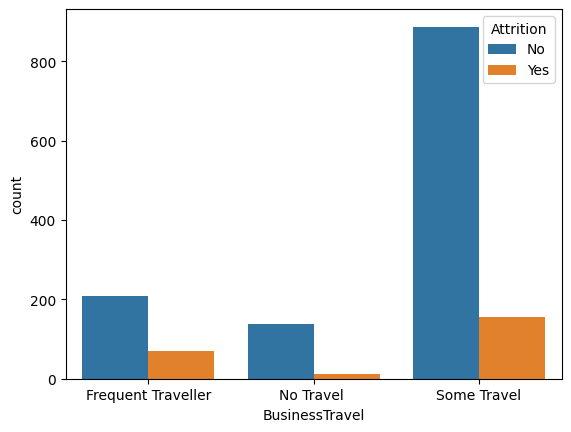

In [ ]:
sns.countplot(hue=df_em.Attrition,x=df_em.BusinessTravel)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

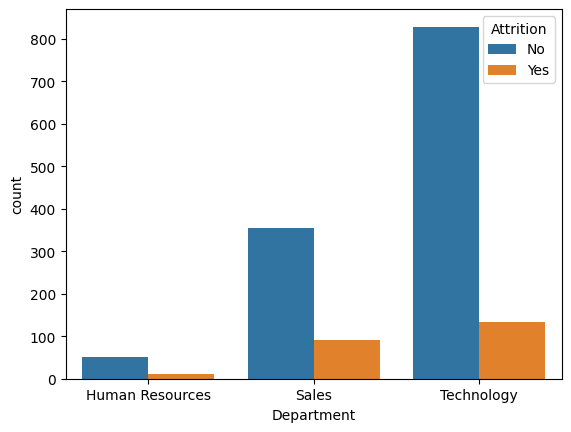

In [ ]:
sns.countplot(hue=df_em.Attrition,x=df_em.Department)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

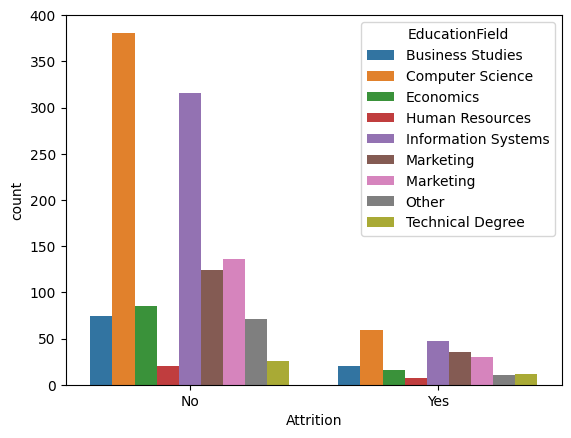

In [ ]:
 sns.countplot(x=df_em.Attrition,hue=df_em.EducationField)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

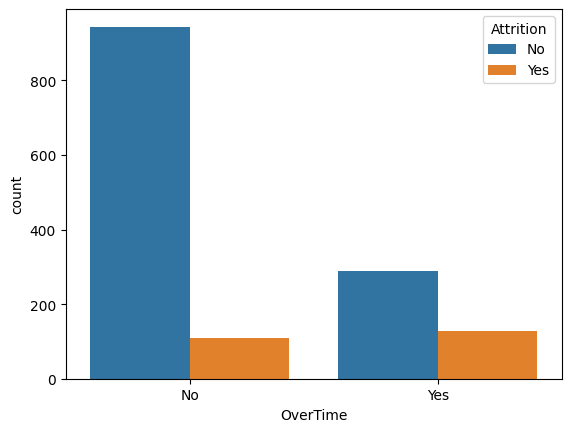

In [ ]:
sns.countplot(hue=df_em.Attrition,x=df_em.OverTime)
plt.show

In [ ]:
df_em.head(1)

,EmployeeID,FirstName,LastName,Gender,Age,BusinessTravel,Department,DistanceFromHome_KM,State,Ethnicity,...,MaritalStatus,Salary,StockOptionLevel,OverTime,HireDate,Attrition,YearsAtCompany,YearsInMostRecentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,3012-1A41,Leonelle,Simco,Female,30,Some Travel,Sales,27,IL,White,...,Divorced,102059,1,No,2012-01-03,No,10,4,9,7


<function matplotlib.pyplot.show(close=None, block=None)>

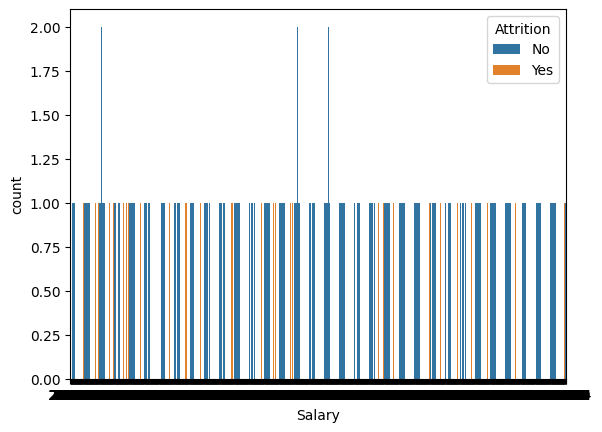

In [ ]:
sns.countplot(hue=df_em.Attrition,x=df_em.Salary)
plt.show

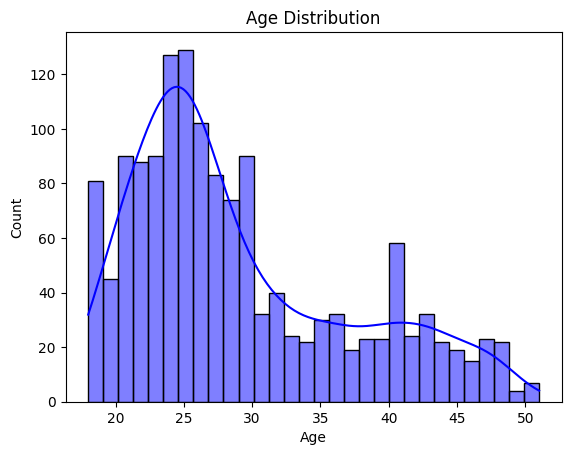

In [ ]:
sns.histplot(df_em['Age'], bins=30, kde=True, color='blue')
plt.title('Age Distribution')
plt.show()

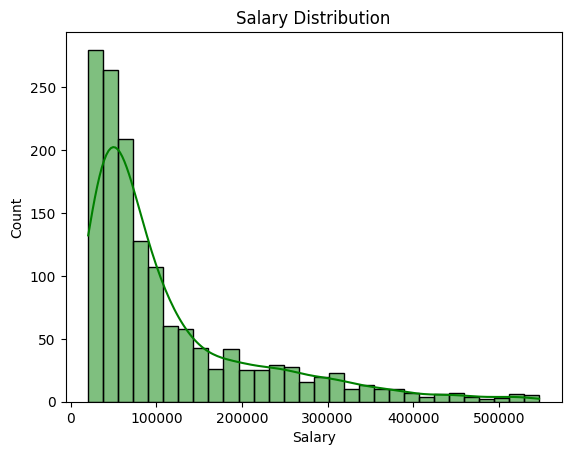

In [ ]:
sns.histplot(df_em['Salary'], bins=30, kde=True, color='green')
plt.title('Salary Distribution')
plt.show()

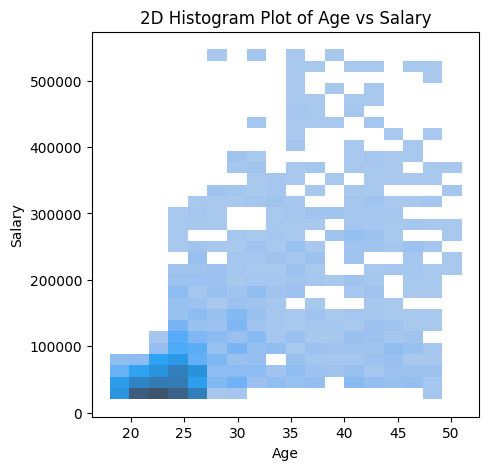

In [ ]:
plt.figure(figsize=(5,5))
sns.histplot(x=df_em['Age'], y=df_em['Salary'])
plt.title('2D Histogram Plot of Age vs Salary')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.show()


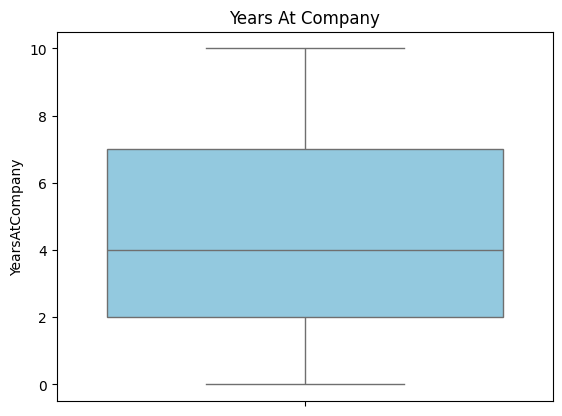

In [ ]:
sns.boxplot(df_em['YearsAtCompany'], color='skyblue')
plt.title('Years At Company')
plt.show()

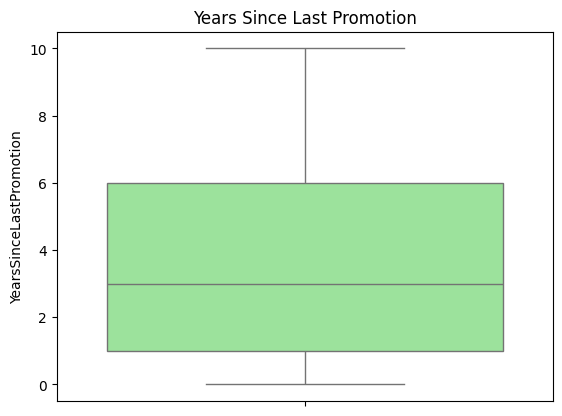

In [ ]:
sns.boxplot(y=df_em['YearsSinceLastPromotion'], color='lightgreen')
plt.title('Years Since Last Promotion')
plt.show()

<ipython-input-175-50fc9be16b79>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Department', data=df_em, palette='viridis')


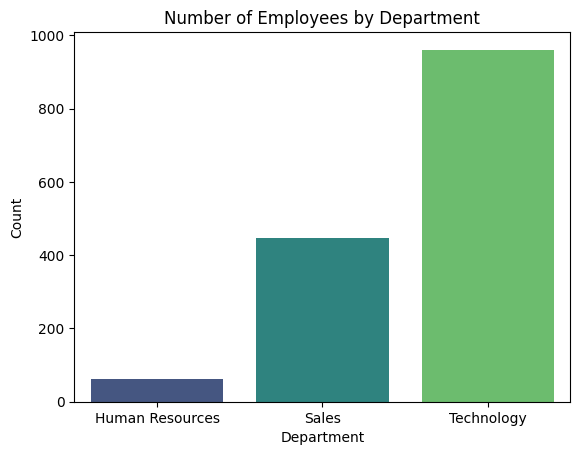

In [ ]:
sns.countplot(x='Department', data=df_em, palette='viridis')
plt.xlabel('Department')
plt.ylabel('Count')
plt.title('Number of Employees by Department')
plt.show()

<ipython-input-176-772169b62b77>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=df_em, palette={'Female': 'hotpink', 'Male': 'blue', 'Other': 'green'})


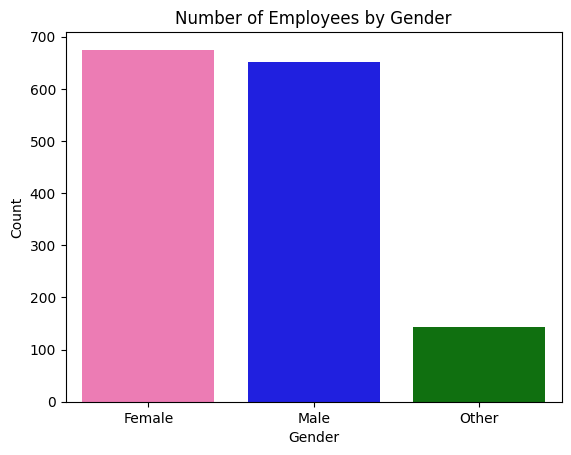

In [ ]:
sns.countplot(x='Gender', data=df_em, palette={'Female': 'hotpink', 'Male': 'blue', 'Other': 'green'})
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Number of Employees by Gender')
plt.show()

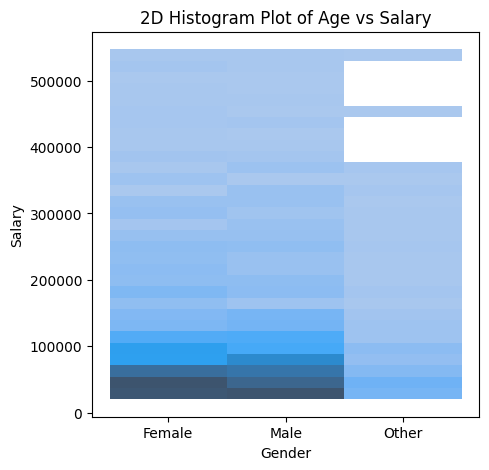

In [ ]:
plt.figure(figsize=(5,5))
sns.histplot(x=df_em['Gender'], y=df_em['Salary'])
plt.title('2D Histogram Plot of Age vs Salary')
plt.xlabel('Gender')
plt.ylabel('Salary')
plt.show()


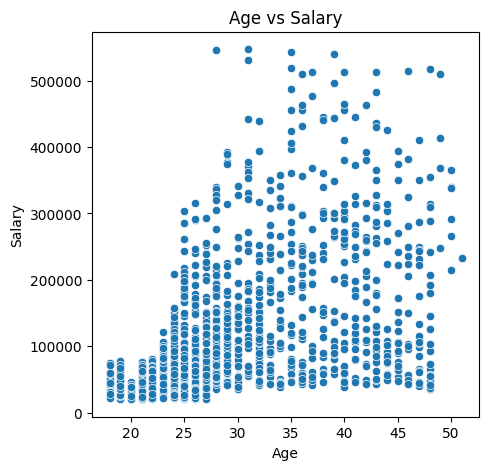

In [ ]:
plt.figure(figsize=(5,5))
sns.scatterplot(x='Age', y='Salary', data=df_em)
plt.title('Age vs Salary')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.show()


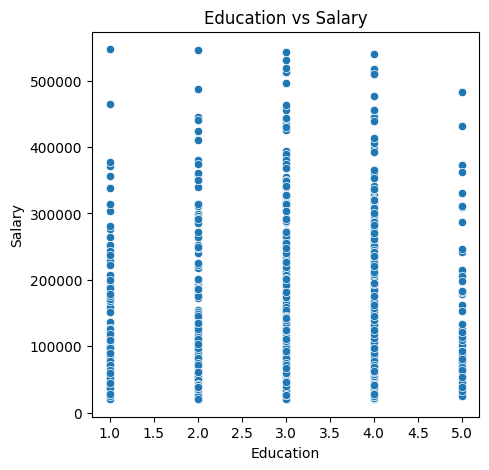

In [ ]:
plt.figure(figsize=(5,5))
sns.scatterplot(x='Education', y='Salary', data=df_em)
plt.title('Education vs Salary')
plt.xlabel('Education')
plt.ylabel('Salary')
plt.show()

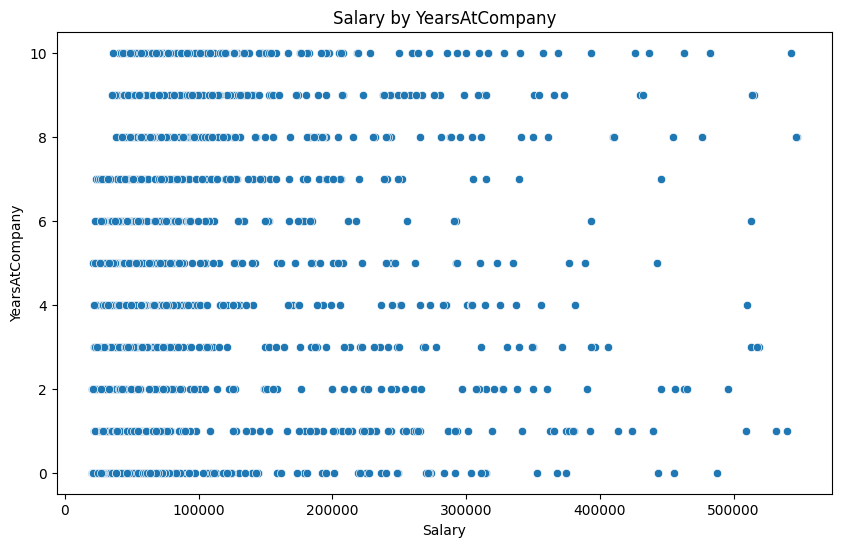

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Salary', y='YearsAtCompany', data=df_em)
plt.title('Salary by YearsAtCompany')
plt.xlabel('Salary')
plt.ylabel('YearsAtCompany')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable h

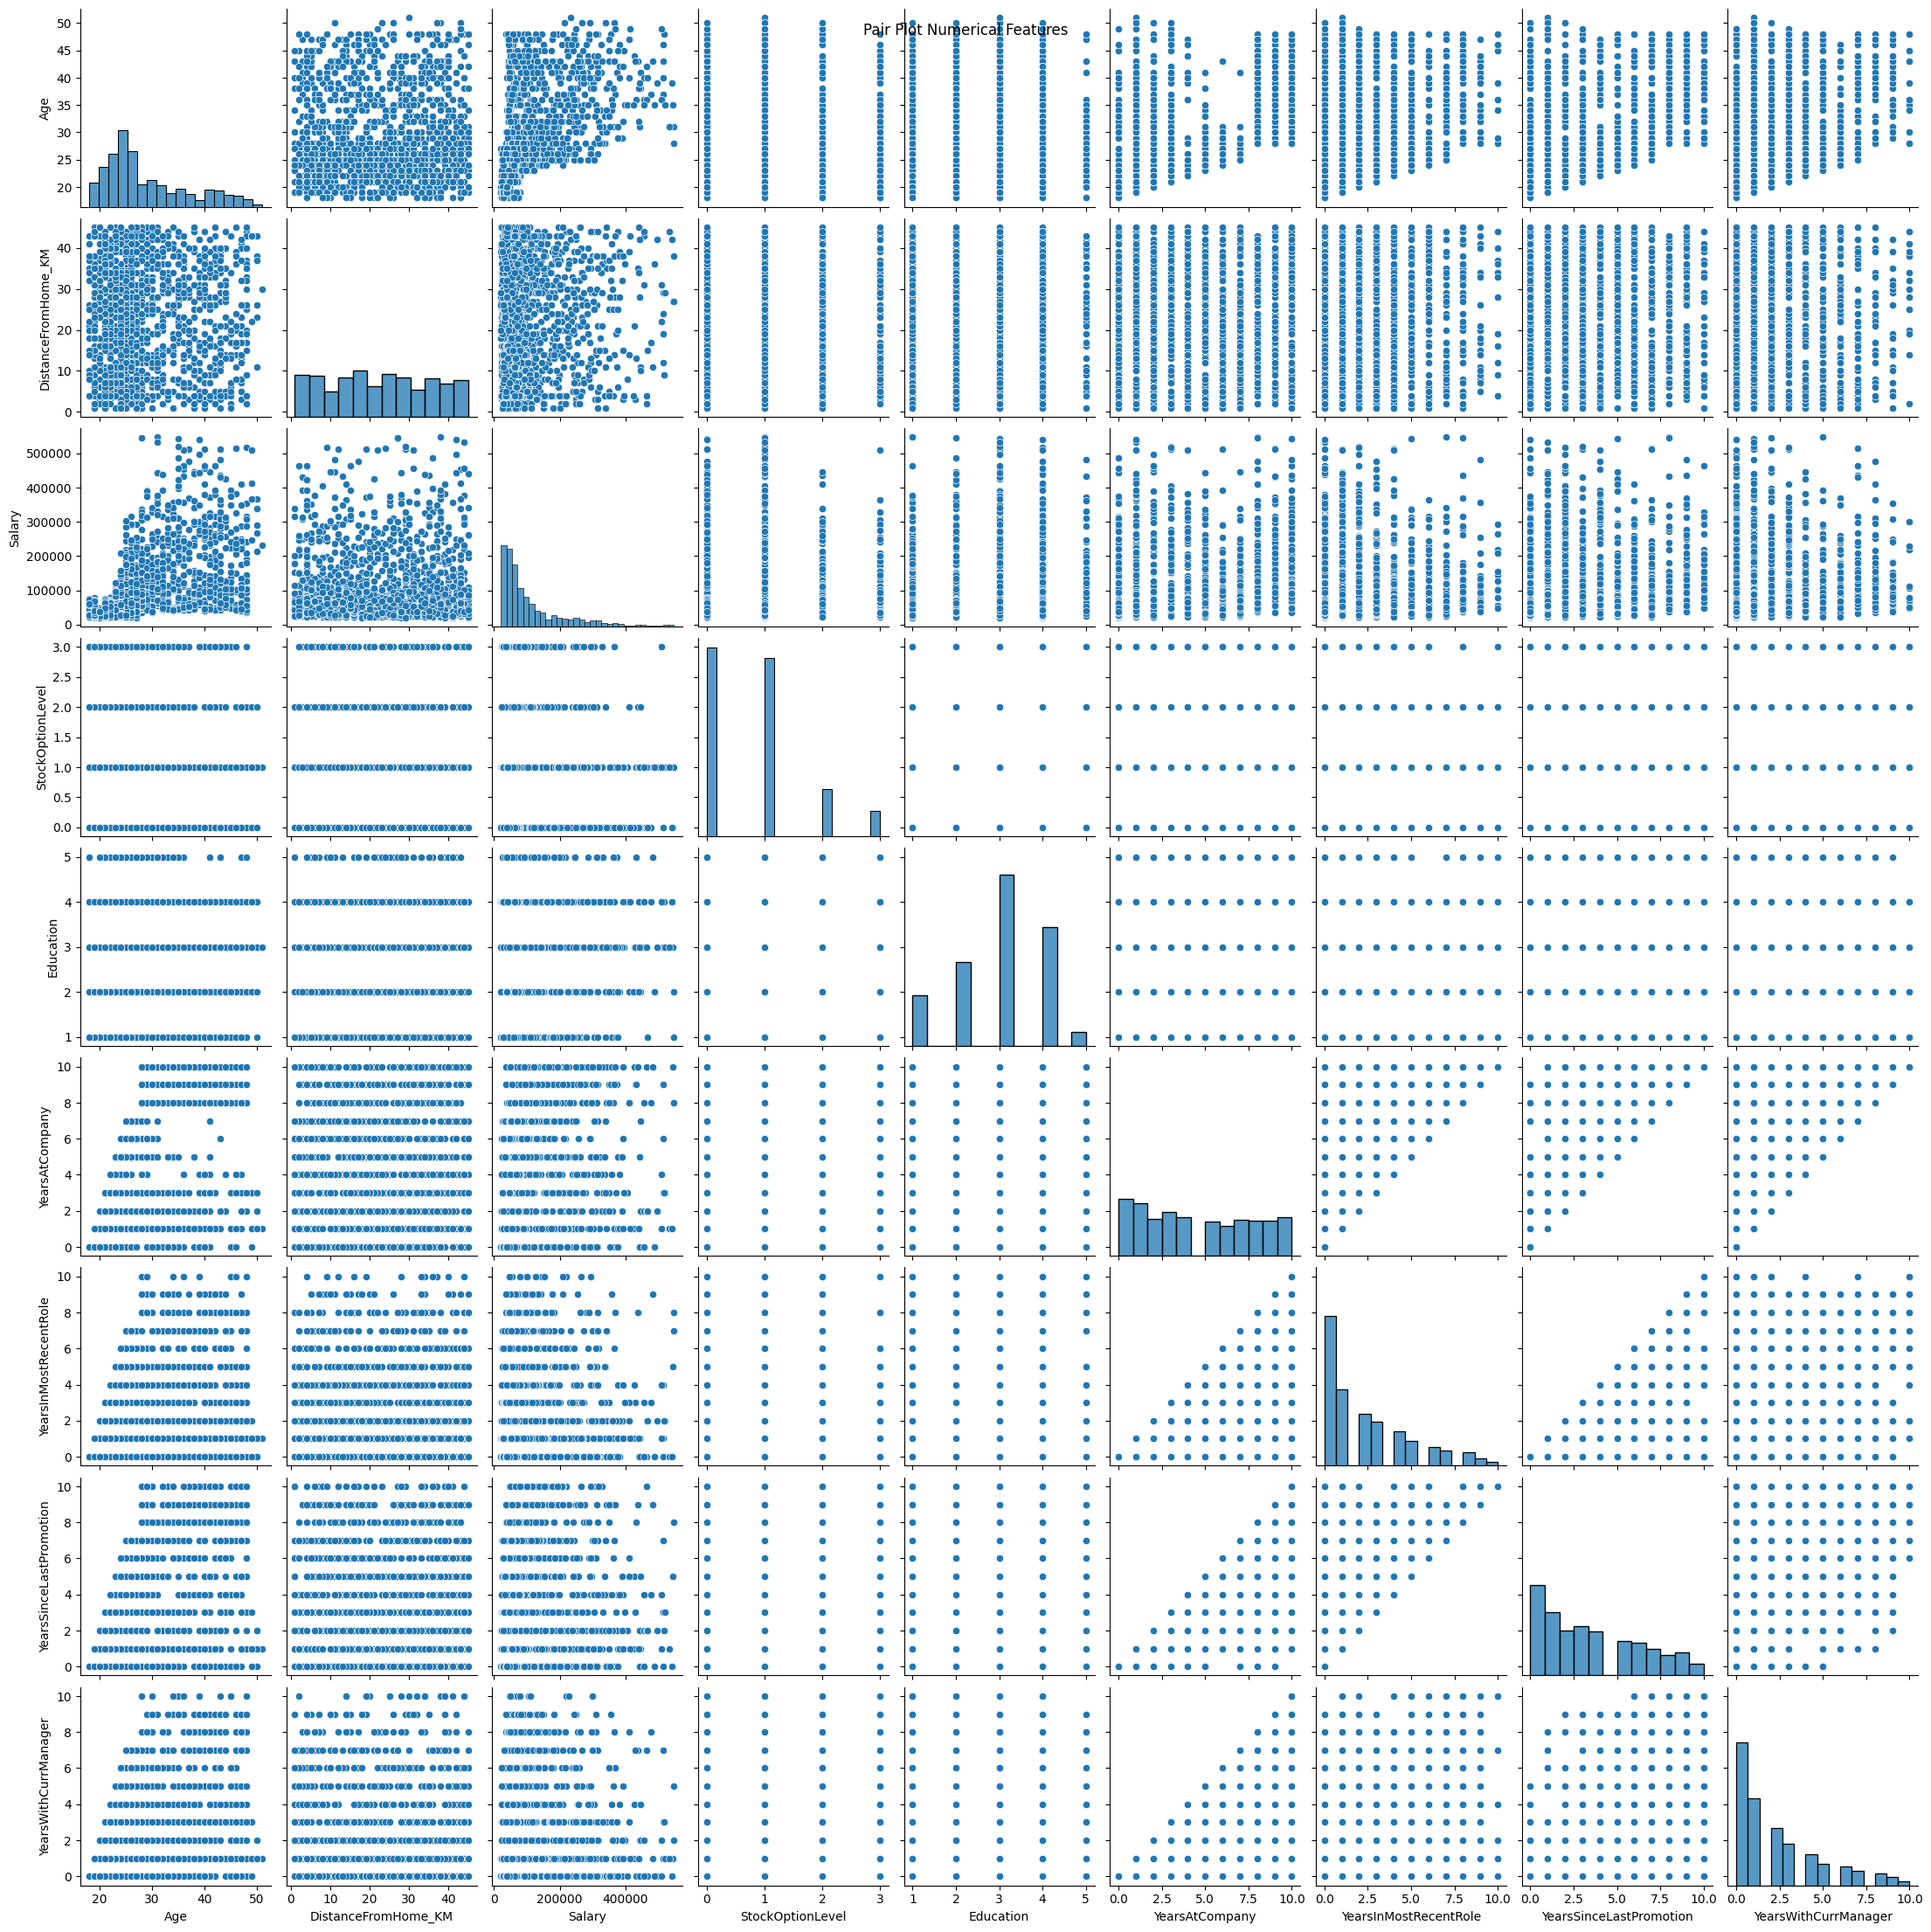

In [ ]:
numerical_cols = ['Age', 'DistanceFromHome_KM', 'Salary', 'StockOptionLevel', 'Education','YearsAtCompany', 'YearsInMostRecentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
sns.pairplot(df_em[numerical_cols],palette='coolwarm')
plt.suptitle('Pair Plot Numerical Features')
plt.show()


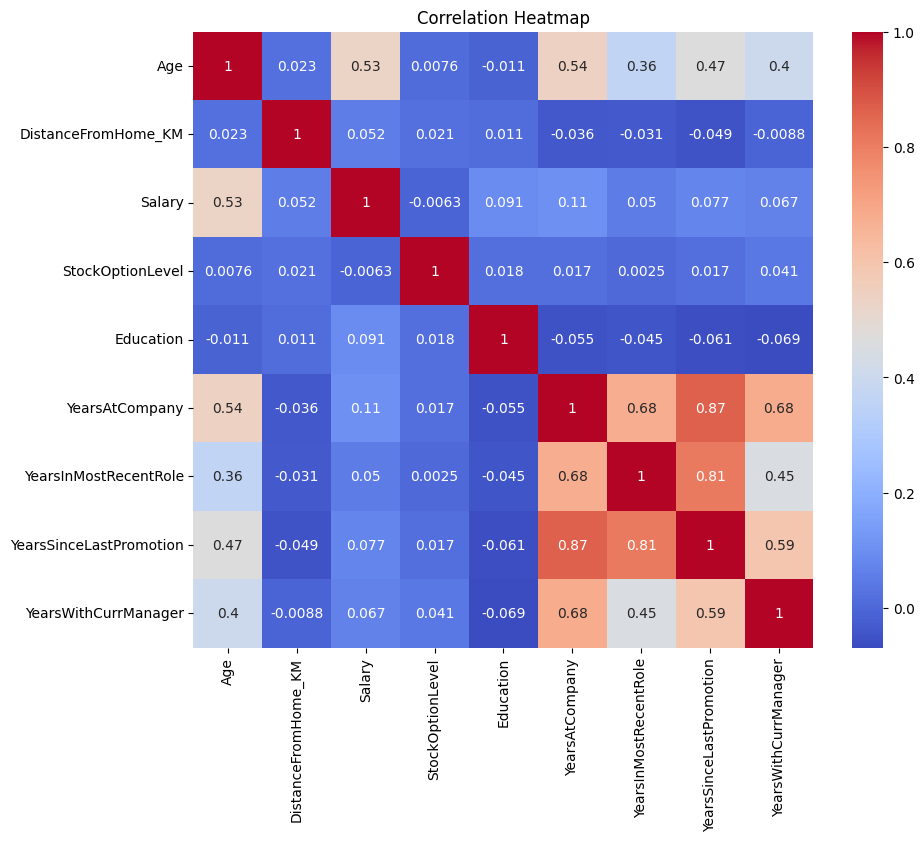

In [ ]:
plt.figure(figsize=(10,8))
numerical_df = df_em[numerical_cols]
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
numerical_df = df_em.select_dtypes(include=['int64', 'float64'])
skewness=numerical_df.skew()
print(skewness)

Age                        0.889578
DistanceFromHome (KM)      0.045868
Education                 -0.289681
Salary                     1.784569
StockOptionLevel           0.968980
YearsAtCompany             0.173710
YearsInMostRecentRole      1.093427
YearsSinceLastPromotion    0.556251
YearsWithCurrManager       1.186677
dtype: float64


In [ ]:
skew_columns = df_em.select_dtypes(include=['int64', 'float64']).columns
for col in skew_columns:
    df_em[col] = np.log1p(df_em[col])

##data after less skewness #





In [ ]:
umerical_df = df_em.select_dtypes(include=['int64', 'float64'])
skewness=numerical_df.skew()
print(skewness)

Age                        0.889578
DistanceFromHome (KM)      0.045868
Education                 -0.289681
Salary                     1.784569
StockOptionLevel           0.968980
YearsAtCompany             0.173710
YearsInMostRecentRole      1.093427
YearsSinceLastPromotion    0.556251
YearsWithCurrManager       1.186677
dtype: float64


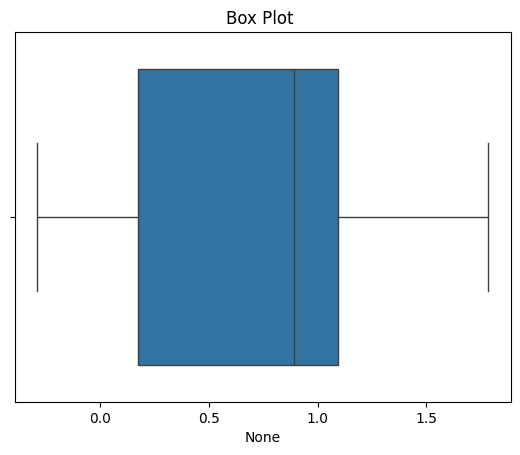

In [ ]:
sns.boxplot(x=skewness)
plt.title('Box Plot ')
plt.show()

In [ ]:
df_em.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   EmployeeID               1470 non-null   category
 1   FirstName                1470 non-null   category
 2   LastName                 1470 non-null   category
 3   Gender                   1470 non-null   category
 4   Age                      1470 non-null   int64   
 5   BusinessTravel           1470 non-null   category
 6   Department               1470 non-null   category
 7   DistanceFromHome_KM      1470 non-null   int64   
 8   State                    1470 non-null   category
 9   Ethnicity                1470 non-null   category
 10  Education                1470 non-null   int64   
 11  EducationField           1470 non-null   category
 12  JobRole                  1470 non-null   category
 13  MaritalStatus            1470 non-null   category
 14  Salary  

In [ ]:
numerical_cols = ['Age', 'DistanceFromHome_KM', 'Salary', 'StockOptionLevel', 'Education','YearsAtCompany', 'YearsInMostRecentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


In [ ]:
scaler=StandardScaler()
numerical_cols = ['Age', 'DistanceFromHome_KM', 'Salary', 'StockOptionLevel', 'Education','YearsAtCompany', 'YearsInMostRecentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
df_em[numerical_cols] = scaler.fit_transform(df_em[numerical_cols])

In [ ]:
#categorical_columns = df_em.select_dtypes(include=['category']).columns

#label_encoder = LabelEncoder()

#for col in categorical_columns:
    #df_em[col] = label_encoder.fit_transform(df_em[col])

#df_em

In [ ]:
from IPython.display import HTML

HTML('<span style="color: red;font-size: 40px;">         PerformanceRating.csv       </span>')

In [ ]:
df_p=pd.read_csv('PerformanceRating.csv')
df_p

,PerformanceID,EmployeeID,ReviewDate,EnvironmentSatisfaction,JobSatisfaction,RelationshipSatisfaction,TrainingOpportunitiesWithinYear,TrainingOpportunitiesTaken,WorkLifeBalance,SelfRating,ManagerRating
0,PR01,79F7-78EC,1/2/2013,5,4,5,1,0,4,4,4
1,PR02,B61E-0F26,1/3/2013,5,4,4,1,3,4,4,3
2,PR03,F5E3-48BB,1/3/2013,3,4,5,3,2,3,5,4
3,PR04,0678-748A,1/4/2013,5,3,2,2,0,2,3,2
4,PR05,541F-3E19,1/4/2013,5,2,3,1,0,4,4,3
...,...,...,...,...,...,...,...,...,...,...,...
6704,PR995,4F28-CFAF,3/14/2016,5,3,3,3,1,5,5,4
6705,PR996,7C80-94E0,3/14/2016,3,5,4,2,1,3,4,4
6706,PR997,8233-2483,3/14/2016,3,4,2,3,1,2,3,2
6707,PR998,8A5B-3D6E,3/15/2016,5,2,5,2,2,4,3,3


In [ ]:
# Start PerformanceRating analysis

In [ ]:
df_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6709 entries, 0 to 6708
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   PerformanceID                    6709 non-null   object
 1   EmployeeID                       6709 non-null   object
 2   ReviewDate                       6709 non-null   object
 3   EnvironmentSatisfaction          6709 non-null   int64 
 4   JobSatisfaction                  6709 non-null   int64 
 5   RelationshipSatisfaction         6709 non-null   int64 
 6   TrainingOpportunitiesWithinYear  6709 non-null   int64 
 7   TrainingOpportunitiesTaken       6709 non-null   int64 
 8   WorkLifeBalance                  6709 non-null   int64 
 9   SelfRating                       6709 non-null   int64 
 10  ManagerRating                    6709 non-null   int64 
dtypes: int64(8), object(3)
memory usage: 576.7+ KB


In [ ]:
df_p.isnull().sum()

,0
PerformanceID,0
EmployeeID,0
ReviewDate,0
EnvironmentSatisfaction,0
JobSatisfaction,0
RelationshipSatisfaction,0
TrainingOpportunitiesWithinYear,0
TrainingOpportunitiesTaken,0
WorkLifeBalance,0
SelfRating,0


In [ ]:
df_p.describe()

,EnvironmentSatisfaction,JobSatisfaction,RelationshipSatisfaction,TrainingOpportunitiesWithinYear,TrainingOpportunitiesTaken,WorkLifeBalance,SelfRating,ManagerRating
count,6709.000000,6709.000000,6709.000000,6709.000000,6709.000000,6709.000000,6709.000000,6709.000000
mean,3.872559,3.430616,3.427336,2.012968,1.017290,3.414667,3.984051,3.473394
std,0.940701,1.152565,1.156753,0.820310,0.950316,1.143961,0.816432,0.961738
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,3.000000,2.000000
25%,3.000000,2.000000,2.000000,1.000000,0.000000,2.000000,3.000000,3.000000
50%,4.000000,3.000000,3.000000,2.000000,1.000000,3.000000,4.000000,3.000000
75%,5.000000,4.000000,4.000000,3.000000,2.000000,4.000000,5.000000,4.000000
max,5.000000,5.000000,5.000000,3.000000,3.000000,5.000000,5.000000,5.000000


In [ ]:
for col in df_p.select_dtypes(include=['object']).columns:
    df_p[col] = df_p[col].astype('category')

In [ ]:
df_p['ReviewDate'] = pd.to_datetime(df_p['ReviewDate'])

In [ ]:
df_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6709 entries, 0 to 6708
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   PerformanceID                    6709 non-null   category
 1   EmployeeID                       6709 non-null   category
 2   ReviewDate                       6709 non-null   category
 3   EnvironmentSatisfaction          6709 non-null   int64   
 4   JobSatisfaction                  6709 non-null   int64   
 5   RelationshipSatisfaction         6709 non-null   int64   
 6   TrainingOpportunitiesWithinYear  6709 non-null   int64   
 7   TrainingOpportunitiesTaken       6709 non-null   int64   
 8   WorkLifeBalance                  6709 non-null   int64   
 9   SelfRating                       6709 non-null   int64   
 10  ManagerRating                    6709 non-null   int64   
dtypes: category(3), int64(8)
memory usage: 897.7 KB


In [ ]:
duplicates = df_p.duplicated()
print(duplicates.sum())

0


Text(0.5, 1.0, 'Environment Satisfaction Distribution')

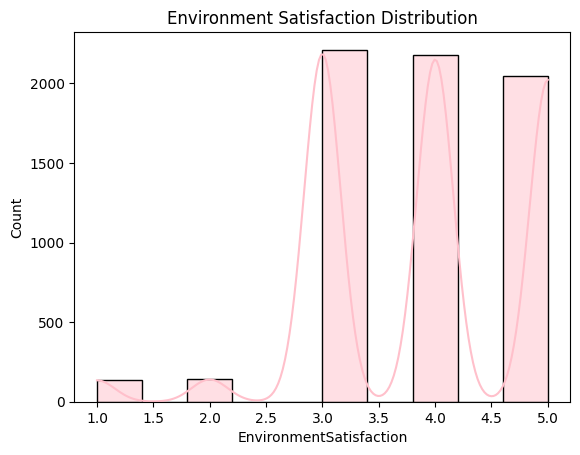

In [ ]:

sns.histplot(df_p['EnvironmentSatisfaction'], bins=10, kde=True, color='pink')
plt.title('Environment Satisfaction Distribution')

Text(0.5, 1.0, 'Job Satisfaction Distribution')

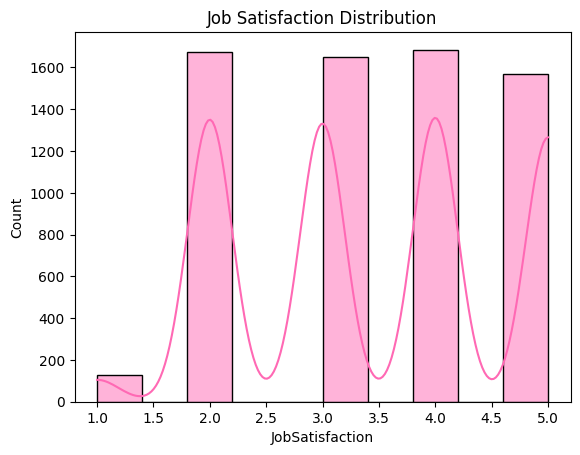

In [ ]:
sns.histplot(df_p['JobSatisfaction'], bins=10, kde=True, color='hotpink')
plt.title('Job Satisfaction Distribution')

In [ ]:
numerical_df = df_p.select_dtypes(include=['int64', 'float64'])
skewness_p=numerical_df.skew()
print(skewness_p)

EnvironmentSatisfaction           -0.480375
JobSatisfaction                   -0.051064
RelationshipSatisfaction          -0.055074
TrainingOpportunitiesWithinYear   -0.023940
TrainingOpportunitiesTaken         0.591062
WorkLifeBalance                   -0.028159
SelfRating                         0.029309
ManagerRating                      0.016216
dtype: float64


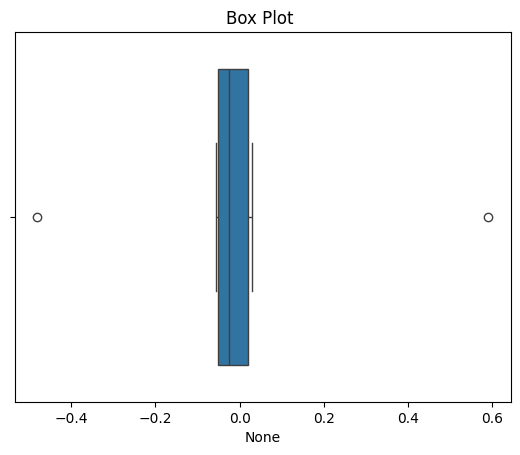

In [ ]:
sns.boxplot(x=skewness_p)
plt.title('Box Plot ')
plt.show()

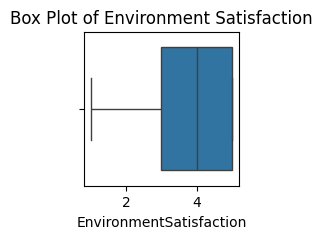

In [ ]:
plt.figure(figsize=(2,2))
sns.boxplot(x=df_p['EnvironmentSatisfaction'])
plt.title('Box Plot of Environment Satisfaction')
plt.show()


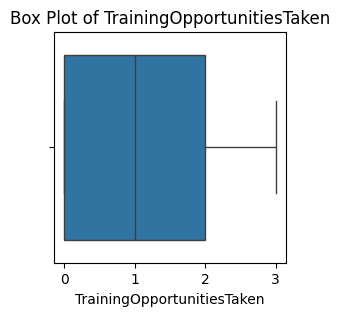

In [ ]:
plt.figure(figsize=(3,3))
sns.boxplot(x=df_p['TrainingOpportunitiesTaken'])
plt.title('Box Plot of TrainingOpportunitiesTaken')
plt.show()

Text(0.5, 1.0, 'TrainingOpportunitiesTaken Distribution')

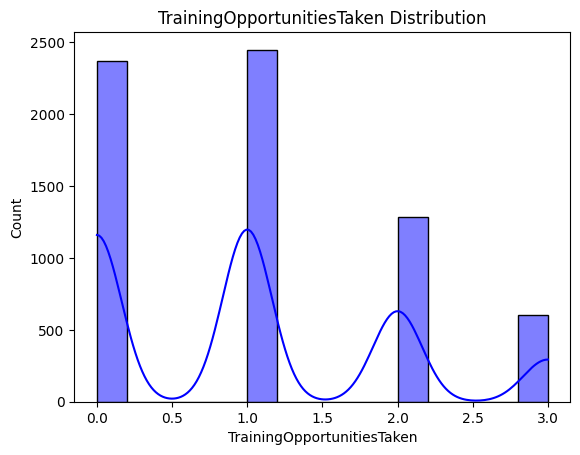

In [ ]:
sns.histplot(df_p['TrainingOpportunitiesTaken'], kde=True, color='blue')
plt.title('TrainingOpportunitiesTaken Distribution')

Text(0.5, 1.0, 'EnvironmentSatisfaction Distribution')

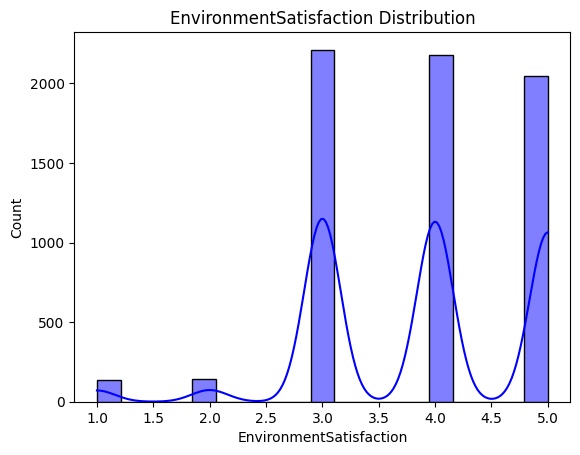

In [ ]:
sns.histplot(df_p['EnvironmentSatisfaction'], kde=True, color='blue')
plt.title('EnvironmentSatisfaction Distribution')

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has be

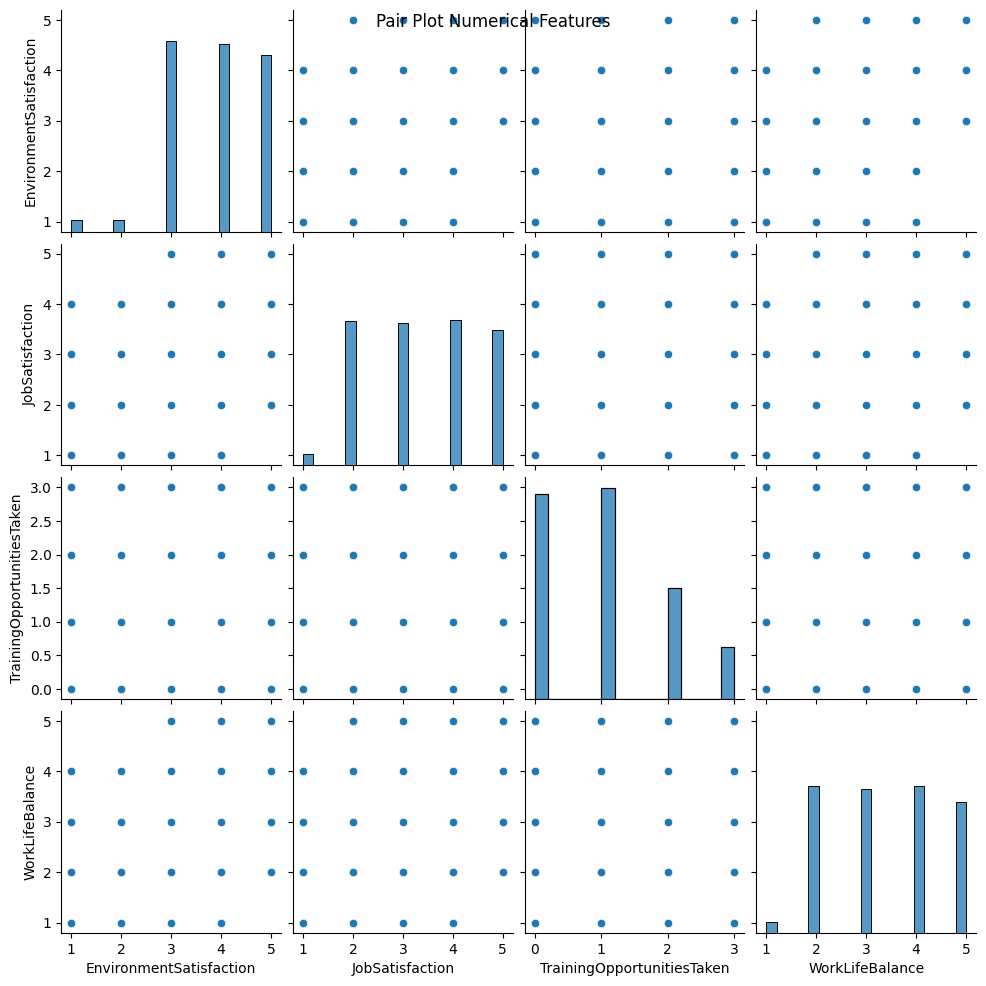

In [ ]:
numerical_cols_p = ['EnvironmentSatisfaction', 'JobSatisfaction', 'TrainingOpportunitiesTaken','WorkLifeBalance']
sns.pairplot(df_p[numerical_cols_p],palette='coolwarm')
plt.suptitle('Pair Plot Numerical Features')
plt.show()

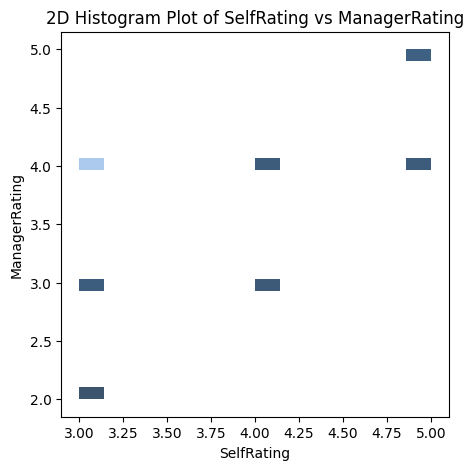

In [ ]:
plt.figure(figsize=(5,5))
sns.histplot(x=df_p['SelfRating'], y=df_p['ManagerRating'])
plt.title('2D Histogram Plot of SelfRating vs ManagerRating')
plt.xlabel('SelfRating')
plt.ylabel('ManagerRating')
plt.show()

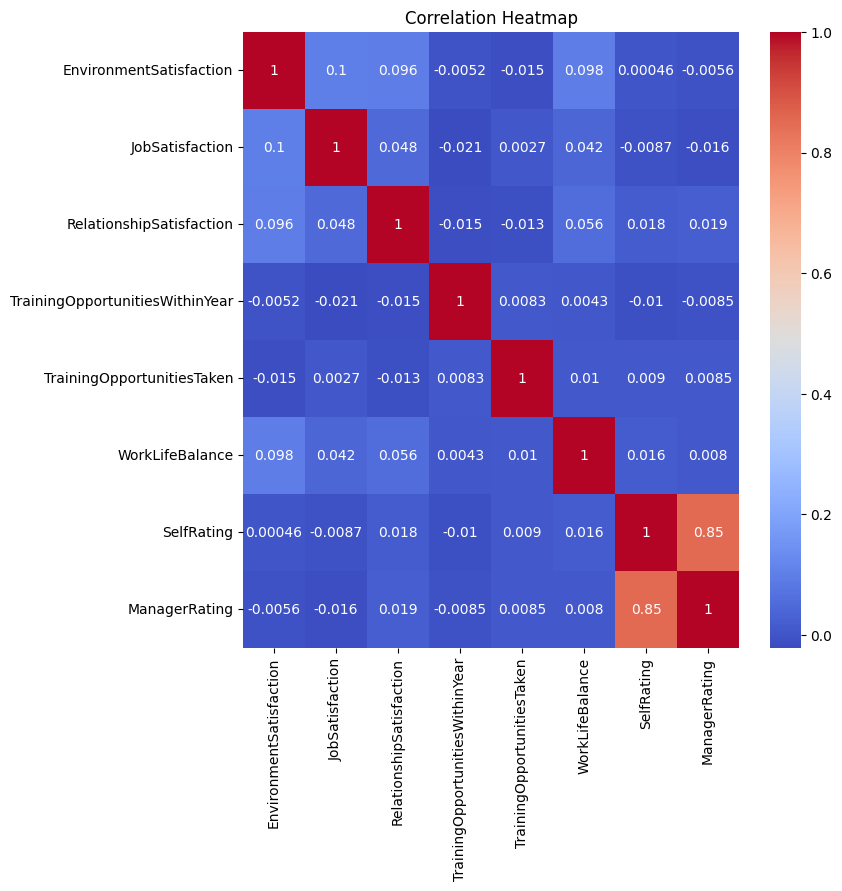

In [ ]:
numerical_cols_p = ['EnvironmentSatisfaction', 'JobSatisfaction','RelationshipSatisfaction', 'TrainingOpportunitiesWithinYear',
'TrainingOpportunitiesTaken', 'WorkLifeBalance',  'SelfRating', 'ManagerRating']
numerical_features = df_p[numerical_cols_p]
plt.figure(figsize=(8,8))
sns.heatmap(numerical_features.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Text(0.5, 1.0, 'ManagerRating Distribution')

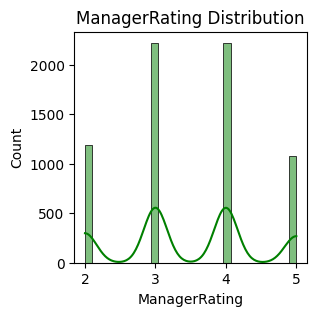

In [ ]:
plt.figure(figsize=(3,3))
sns.histplot(df_p['ManagerRating'],  kde=True, color='green')
plt.title('ManagerRating Distribution')

Text(0.5, 1.0, 'SelfRating Distribution')

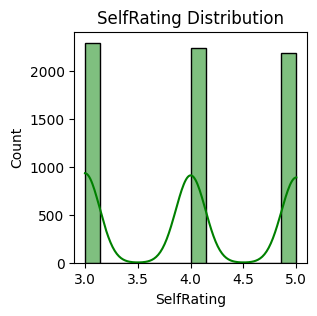

In [ ]:
plt.figure(figsize=(3,3))
sns.histplot(df_p['SelfRating'],  kde=True, color='green')
plt.title('SelfRating Distribution')

Text(0.5, 1.0, 'JobSatisfaction Distribution')

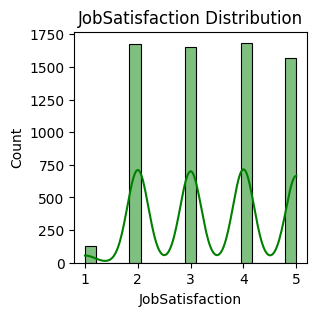

In [ ]:
plt.figure(figsize=(3,3))
sns.histplot(df_p['JobSatisfaction'],  kde=True, color='green')
plt.title('JobSatisfaction Distribution')

Text(0.5, 1.0, 'WorkLifeBalance Distribution')

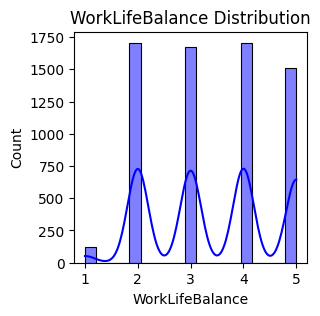

In [ ]:
plt.figure(figsize=(3,3))
sns.histplot(df_p['WorkLifeBalance'],  kde=True, color='blue')
plt.title('WorkLifeBalance Distribution')

Text(0.5, 1.0, 'RelationshipSatisfaction Distribution')

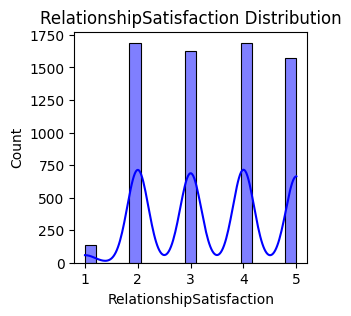

In [ ]:
plt.figure(figsize=(3,3))
sns.histplot(df_p['RelationshipSatisfaction'],  kde=True, color='blue')
plt.title('RelationshipSatisfaction Distribution')

In [ ]:
from IPython.display import HTML

HTML('<span style="color: red;font-size: 40px;">        RatingLevel.csv      </span>')

In [ ]:
df_r=pd.read_csv('RatingLevel.csv')
df_r

,RatingID,RatingLevel
0,1,Unacceptable
1,2,Needs Improvement
2,3,Meets Expectation
3,4,Exceeds Expectation
4,5,Above and Beyond


In [ ]:
df_r.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   RatingID     5 non-null      int64 
 1   RatingLevel  5 non-null      object
dtypes: int64(1), object(1)
memory usage: 208.0+ bytes


In [ ]:
df_r['RatingLevel']=df_r['RatingLevel'].astype('category')

In [ ]:
df_r.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   RatingID     5 non-null      int64   
 1   RatingLevel  5 non-null      category
dtypes: category(1), int64(1)
memory usage: 385.0 bytes


In [ ]:
from IPython.display import HTML

HTML('<span style="color: red;font-size: 40px;">        SatisfiedLevel.csv     </span>')

In [ ]:
df_s=pd.read_csv('SatisfiedLevel.csv')
df_s

,SatisfactionID,SatisfactionLevel
0,1,Very Dissatisfied
1,2,Dissatisfied
2,3,Neutral
3,4,Satisfied
4,5,Very Satisfied


In [ ]:
df_s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   SatisfactionID     5 non-null      int64 
 1   SatisfactionLevel  5 non-null      object
dtypes: int64(1), object(1)
memory usage: 208.0+ bytes


In [ ]:
df_s['SatisfactionLevel']=df_s['SatisfactionLevel'].astype('category')

In [ ]:
df_s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   SatisfactionID     5 non-null      int64   
 1   SatisfactionLevel  5 non-null      category
dtypes: category(1), int64(1)
memory usage: 385.0 bytes


In [ ]:
from IPython.display import HTML

HTML('<span style="color: red;font-size: 40px;">      Concatenate The DataFrames         </span>')

In [ ]:
df_ed.reset_index(drop=True, inplace=True)
df_r.reset_index(drop=True, inplace=True)
df_s.reset_index(drop=True, inplace=True)
combined_df2 = pd.concat([df_ed, df_r, df_s], axis=1)
combined_df2

,EducationLevelID,EducationLevel,RatingID,RatingLevel,SatisfactionID,SatisfactionLevel
0,1,No Formal Qualifications,1,Unacceptable,1,Very Dissatisfied
1,2,High School,2,Needs Improvement,2,Dissatisfied
2,3,Bachelors,3,Meets Expectation,3,Neutral
3,4,Masters,4,Exceeds Expectation,4,Satisfied
4,5,Doctorate,5,Above and Beyond,5,Very Satisfied


In [ ]:
combined_df2.to_excel('combined_data1.xlsx') # df_ed, df_r, df_s


In [ ]:
combined_df2=pd.read_excel('combined_data1.xlsx')#df_ed, df_r, df_s
combined_df2

,Unnamed: 0,EducationLevelID,EducationLevel,RatingID,RatingLevel,SatisfactionID,SatisfactionLevel
0,0,1,No Formal Qualifications,1,Unacceptable,1,Very Dissatisfied
1,1,2,High School,2,Needs Improvement,2,Dissatisfied
2,2,3,Bachelors,3,Meets Expectation,3,Neutral
3,3,4,Masters,4,Exceeds Expectation,4,Satisfied
4,4,5,Doctorate,5,Above and Beyond,5,Very Satisfied


In [ ]:

combined_df_horizontal = pd.merge(df_em, df_p, on='EmployeeID', how='inner')
print(combined_df_horizontal.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6709 entries, 0 to 6708
Data columns (total 33 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   EmployeeID                       6709 non-null   object  
 1   FirstName                        6709 non-null   category
 2   LastName                         6709 non-null   category
 3   Gender                           6709 non-null   category
 4   Age                              6709 non-null   int64   
 5   BusinessTravel                   6709 non-null   category
 6   Department                       6709 non-null   category
 7   DistanceFromHome_KM              6709 non-null   int64   
 8   State                            6709 non-null   category
 9   Ethnicity                        6709 non-null   category
 10  Education                        6709 non-null   int64   
 11  EducationField                   6709 non-null   category
 12  JobRol

In [ ]:
combined_df_horizontal

,EmployeeID,FirstName,LastName,Gender,Age,BusinessTravel,Department,DistanceFromHome_KM,State,Ethnicity,...,PerformanceID,ReviewDate,EnvironmentSatisfaction,JobSatisfaction,RelationshipSatisfaction,TrainingOpportunitiesWithinYear,TrainingOpportunitiesTaken,WorkLifeBalance,SelfRating,ManagerRating
0,3012-1A41,Leonelle,Simco,Female,30,Some Travel,Sales,27,IL,White,...,PR1295,2016-10-30,3,3,2,3,0,4,3,3
1,3012-1A41,Leonelle,Simco,Female,30,Some Travel,Sales,27,IL,White,...,PR1908,2017-10-30,4,4,5,3,1,2,3,2
2,3012-1A41,Leonelle,Simco,Female,30,Some Travel,Sales,27,IL,White,...,PR2617,2018-10-30,5,5,4,3,0,4,5,5
3,3012-1A41,Leonelle,Simco,Female,30,Some Travel,Sales,27,IL,White,...,PR3436,2019-10-30,1,3,2,3,1,3,5,4
4,3012-1A41,Leonelle,Simco,Female,30,Some Travel,Sales,27,IL,White,...,PR411,2014-10-31,3,4,2,1,0,3,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6704,06E8-4FD4,Emilee,Wenham,Female,20,Some Travel,Sales,32,CA,Black or African American,...,PR355,2014-06-05,5,2,3,1,0,3,3,2
6705,06E8-4FD4,Emilee,Wenham,Female,20,Some Travel,Sales,32,CA,Black or African American,...,PR4032,2020-06-03,5,3,2,3,1,4,3,3
6706,06E8-4FD4,Emilee,Wenham,Female,20,Some Travel,Sales,32,CA,Black or African American,...,PR5034,2021-06-03,3,3,3,2,3,3,5,5
6707,06E8-4FD4,Emilee,Wenham,Female,20,Some Travel,Sales,32,CA,Black or African American,...,PR6120,2022-06-03,5,3,5,2,1,3,3,3


In [ ]:
combined_df_horizontal.to_excel('combined_data2.xlsx') # df_em, df_p


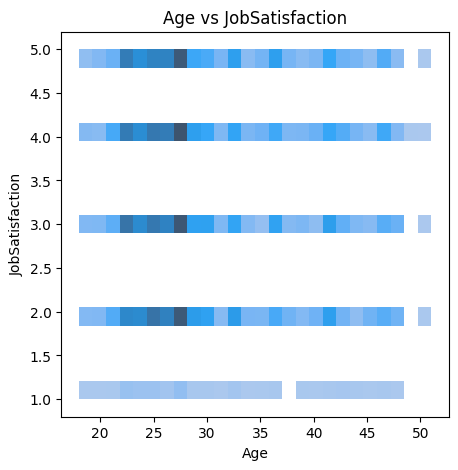

In [ ]:
plt.figure(figsize=(5,5))
sns.histplot(x='Age', y='JobSatisfaction', data=combined_df_horizontal )
plt.title('Age vs JobSatisfaction')
plt.xlabel('Age')
plt.ylabel('JobSatisfaction')
plt.show()

In [ ]:
df_p['EmployeeID'].value_counts()


,count
EmployeeID,
E1B4-9AA1,10
C57E-6E4F,10
9E7A-1F70,10
D91C-815B,10
1472-9F69,10
...,...
D8F6-DED3,1
3B2D-9E60,1
7CDB-25C4,1


In [ ]:
##week 3

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

X = combined_df_horizontal[['Age', 'Salary', 'JobSatisfaction', 'YearsAtCompany']]
y = combined_df_horizontal['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.87      0.93      0.90       904
           1       0.82      0.71      0.76       438

    accuracy                           0.86      1342
   macro avg       0.85      0.82      0.83      1342
weighted avg       0.85      0.86      0.85      1342



##the distribution of job satisfaction over time.






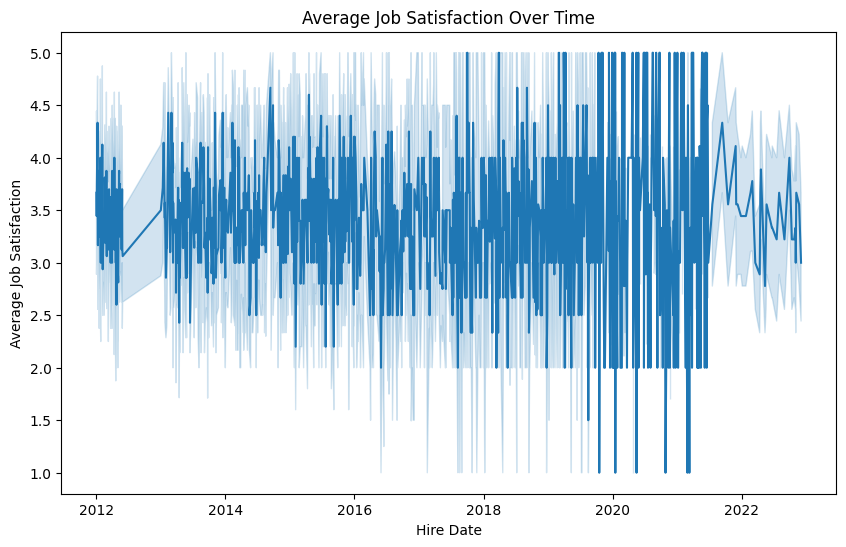

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.lineplot(data=combined_df_horizontal, x='HireDate', y='JobSatisfaction', estimator='mean')
plt.title('Average Job Satisfaction Over Time')
plt.xlabel('Hire Date')
plt.ylabel('Average Job Satisfaction')
plt.show()


##Age and Salary Analysis: Explain how age and salary relate to attrition, mentioning any patterns or anomalies.


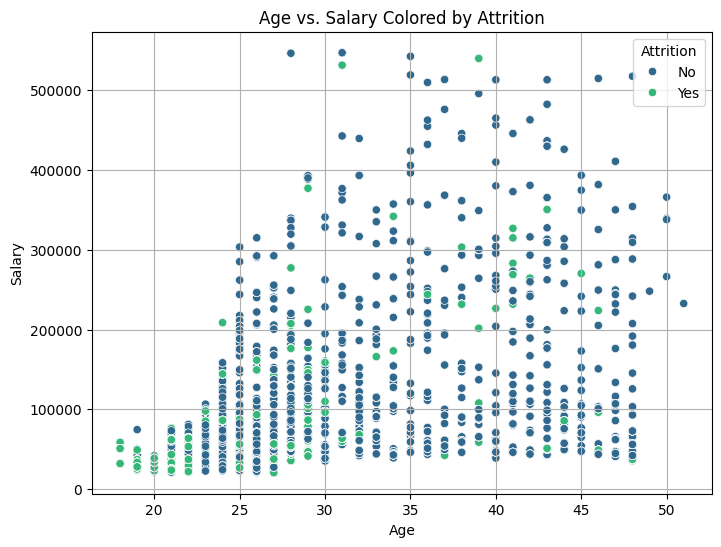

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Salary', hue='Attrition', data=combined_df_horizontal, palette='viridis')
plt.title('Age vs. Salary Colored by Attrition')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.grid()
plt.show()


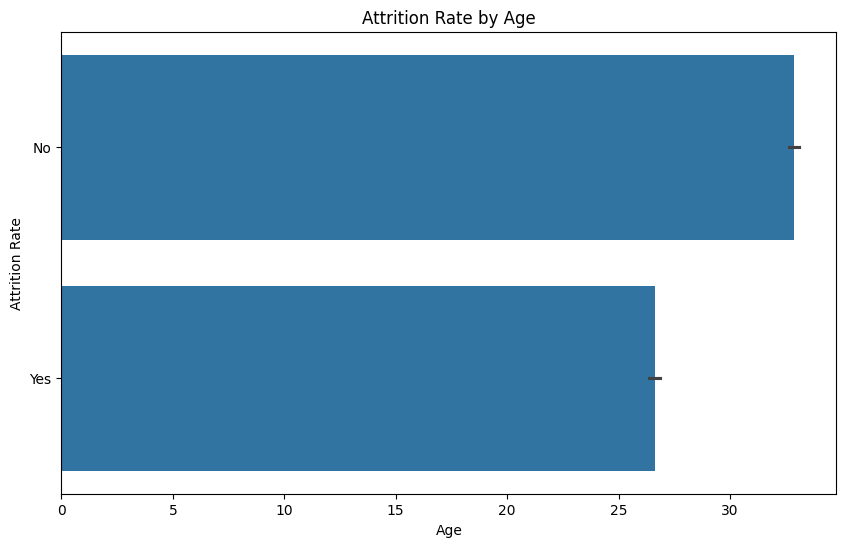

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=combined_df_horizontal, x='Age', y='Attrition', estimator='mean')
plt.title('Attrition Rate by Age')
plt.xlabel('Age')
plt.ylabel('Attrition Rate')
plt.show()
